In [1]:
import numpy as np

In [2]:
import scipy.stats as ss

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set_context('notebook')
sns.set(font_scale=1.225)
sns.set_style('ticks')

In [6]:
cmap = 'Set1'

In [7]:
X = 100
C = 50
P = .5

v2_low = 0.07**2
v2_high = 0.15**2
sigma2 = 0.25**2

beta_low = sigma2/(sigma2+v2_low)
beta_high = sigma2/(sigma2+v2_high)

X = np.linspace(0, 200, 1000)

/Users/gilles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/gilles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


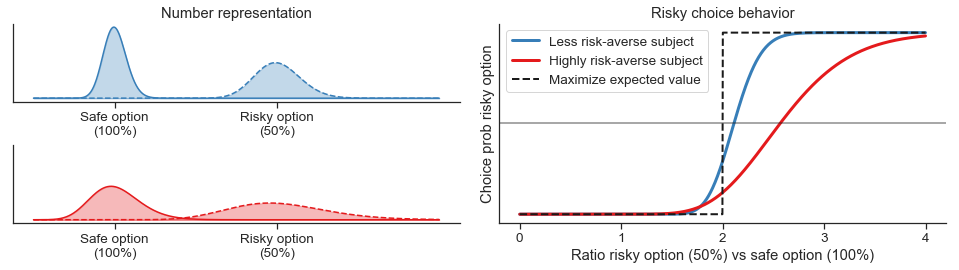

In [8]:
gs1 = plt.GridSpec(2, 2)


plt.subplot(gs1[:2, 1])
plt.title('Risky choice behavior')

# l = plt.plot(X/C * 2, p, c=sns.color_palette(cmap)[1], label='Less risk-averse subject', lw=3)
# p = ss.norm.cdf(delta + gamma * 4 * np.log(X / C))
p_choice = ss.norm.cdf((np.log(X/C) - ((1/beta_low) * np.log(1./P))) / (np.sqrt(2) * np.sqrt(v2_low)))
l = plt.plot(X/C, p_choice, c=sns.color_palette(cmap)[1], label='Less risk-averse subject', lw=3)


p_choice = ss.norm.cdf((np.log(X/C) - ((1/beta_high) * np.log(1./P))) / (np.sqrt(2) * np.sqrt(v2_high)))
l += plt.plot(X/C, p_choice, c=sns.color_palette(cmap)[0], label='Highly risk-averse subject', lw=3)


# p = ss.norm.cdf(delta - .15 + gamma * np.log(X / C))
# l += plt.plot(X/C * 2, p, c=sns.color_palette(cmap)[0], label='Highly risk-averse subject', lw=3)

l += plt.plot(X/C, (X/C) * P > 1, c='k', ls='--', label='Maximize expected value', lw=2)
plt.legend(l, [e.get_label() for e in l], loc='upper left')#, bbox_to_anchor=(0.49, 1.))

sns.despine()
plt.ylabel('Choice prob risky option')
plt.xlabel('Ratio risky option (50%) vs safe option (100%)')
plt.tight_layout()
plt.yticks([])
plt.xticks(np.arange(5, dtype=int))
plt.axhline(.5, c='k', alpha=.5)

ax = plt.subplot(gs1[0, 0])

t = np.linspace(.5, 3, 1000)


plt.title('Number representation')
plt.plot(t, ss.lognorm(scale=1, s=np.sqrt(v2_low)).pdf(t), c=sns.color_palette(cmap)[1])
plt.fill_between(t, ss.lognorm(scale=1, s=np.sqrt(v2_low)).pdf(t), color=sns.color_palette(cmap)[1], alpha=.3)

plt.plot(t, ss.lognorm(scale=2, s=np.sqrt(v2_low)).pdf(t), c=sns.color_palette(cmap)[1], ls='--')
plt.fill_between(t, ss.lognorm(scale=2, s=np.sqrt(v2_low)).pdf(t), color=sns.color_palette(cmap)[1], alpha=.3)

ax2 = plt.subplot(gs1[1, 0], sharex=ax, sharey=ax)

plt.yticks()

plt.plot(t, ss.lognorm(scale=1, s=np.sqrt(v2_high)).pdf(t), c=sns.color_palette(cmap)[0])
plt.fill_between(t, ss.lognorm(scale=1, s=np.sqrt(v2_high)).pdf(t), color=sns.color_palette(cmap)[0], alpha=.3)

plt.plot(t, ss.lognorm(scale=2, s=np.sqrt(v2_high)).pdf(t), c=sns.color_palette(cmap)[0], ls='--')
plt.fill_between(t, ss.lognorm(scale=2, s=np.sqrt(v2_high)).pdf(t), color=sns.color_palette(cmap)[0], alpha=.3)


sns.despine()

plt.gcf().set_size_inches(14, 4)
plt.tight_layout()
plt.yticks()
plt.yticks([])


plt.xticks([1, 2], ['Safe option\n(100%)', 'Risky option\n(50%)'])


plt.gcf().set_size_inches(14, 4)
plt.savefig('fig1b.svg')

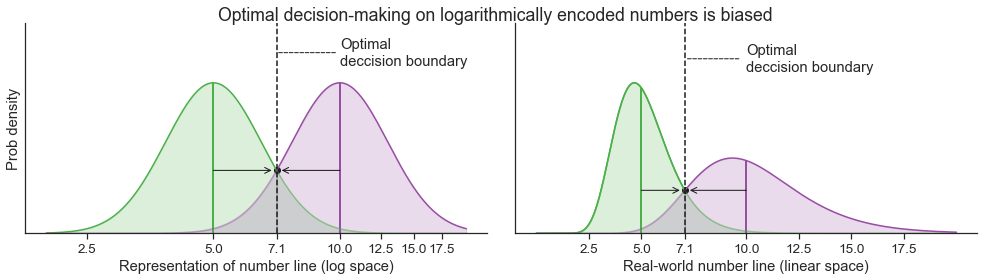

In [16]:
cmap = 'Set1'
plt.subplot(121)


a = ss.norm(np.log(5), np.log(1.3))
b = ss.norm(np.log(10), np.log(1.3))

thr = (np.log(10) + np.log(5)) / 2

t1 = np.linspace(np.log(2), thr, 1000)
t2 = np.linspace(thr, np.log(20), 1000)

plt.plot(t1, a.pdf(t1), color=sns.color_palette(cmap)[2])
plt.plot([np.log(5), np.log(5)], [0, a.pdf(np.log(5))], color=sns.color_palette(cmap)[2], lw=2)
plt.plot([np.log(10), np.log(10)], [0, b.pdf(np.log(10))], color=sns.color_palette(cmap)[3], lw=2)

plt.plot(t2, a.pdf(t2), color=sns.color_palette(cmap)[2], alpha=.5)
plt.plot(t1, b.pdf(t1), color=sns.color_palette(cmap)[3], alpha=.5)
plt.plot(t2, b.pdf(t2), color=sns.color_palette(cmap)[3])
plt.fill_between(t1, a.pdf(t1), color=sns.color_palette(cmap)[2], alpha=.2)
plt.fill_between(t2, a.pdf(t2), color=sns.color_palette(cmap)[2], alpha=.2)
plt.fill_between(t1, b.pdf(t1), color=sns.color_palette(cmap)[3], alpha=.2)
plt.fill_between(t2, b.pdf(t2), color=sns.color_palette(cmap)[3], alpha=.2)

plt.axvline(thr, c='k', label='Normal decision boundary', ls='--')
plt.scatter(thr, a.pdf(thr), c='k')
plt.annotate('', (thr, a.pdf(thr)), 
             xytext=(np.log(5), a.pdf(thr)),
             arrowprops={'arrowstyle':'- >', 'color':'k',
                         'shrinkA':0, 'shrinkB':5},
            va='center',
            ha='center')

plt.annotate('', (thr, a.pdf(thr)), 
             xytext=(np.log(10), a.pdf(thr)),
             arrowprops={'arrowstyle':'- >', 'color':'k',
                         'shrinkA':0, 'shrinkB':5},            
             va='center',
            ha='center')



plt.xlabel('Representation of number line (log space)')
plt.ylabel('Prob density')
plt.yticks()

# plt.xticks([5, 7.5, 10], ['5', '7.5', '10'])
plt.ylim(0, 1.4*a.pdf(t1).max())

plt.annotate('Optimal\ndeccision boundary', (np.log(7), 1.2*a.pdf(np.log(5))), 
             xytext=(np.log(10), 1.2*a.pdf(np.log(5))),
             arrowprops={'arrowstyle':'-', 'color':'k', 'linestyle':'--',},
            va='center',
            ha='left')



# plt.xlim(0, 17)
# plt.yticks([])

l = [2.5, 5, np.exp(thr), 10, 12.5, 15, 17.5]
# plt.xticks(np.log(l), l)

plt.xticks(np.log(l), np.round(l, 1))


plt.gcf().set_size_inches(13/2., 3)
sns.despine()
plt.yticks([])

ax = plt.subplot(122)
a = ss.lognorm(scale=5,s=np.log(1.3))
b = ss.lognorm(scale=10, s=np.log(1.3))

t = np.linspace(5, 10, 100000)
thr = t[np.argmin((a.pdf(t) - b.pdf(t)) > 0)]

t1 = np.linspace(0, thr, 1000)
t2 = np.linspace(thr, 20, 1000) 

plt.plot([5, 5], [0, a.pdf(5)], color=sns.color_palette(cmap)[2], lw=2)
plt.plot([10, 10], [0, b.pdf(10)], color=sns.color_palette(cmap)[3], lw=2)

plt.plot(t1, a.pdf(t1), color=sns.color_palette(cmap)[2])
plt.plot(t1, a.pdf(t1), color=sns.color_palette(cmap)[2])
plt.plot(t2, a.pdf(t2), color=sns.color_palette(cmap)[2], alpha=.5)
plt.plot(t1, b.pdf(t1), color=sns.color_palette(cmap)[3], alpha=.5)
plt.plot(t2, b.pdf(t2), color=sns.color_palette(cmap)[3])

plt.fill_between(t1, a.pdf(t1), color=sns.color_palette(cmap)[2], alpha=.2)
plt.fill_between(t2, a.pdf(t2), color=sns.color_palette(cmap)[2], alpha=.2)

plt.fill_between(t1, b.pdf(t1), color=sns.color_palette(cmap)[3], alpha=.2)
plt.fill_between(t2, b.pdf(t2), color=sns.color_palette(cmap)[3], alpha=.2)


plt.scatter(thr, a.pdf(thr), c='k')
plt.annotate('', (thr, a.pdf(thr)), 
             xytext=(5, a.pdf(thr)),
             arrowprops={'arrowstyle':'- >', 'color':'k',
                         'shrinkA':0, 'shrinkB':5},
            va='center',
            ha='center')

plt.annotate('', (thr, a.pdf(thr)), 
             xytext=(10, a.pdf(thr)),
             arrowprops={'arrowstyle':'- >', 'color':'k',
                         'shrinkA':0, 'shrinkB':5},            va='center',
            ha='center')

plt.axvline(thr, c='k', label='Normal decision boundary', ls='--')
plt.xlabel('Real-world number line (linear space)')

plt.annotate('Optimal\ndeccision boundary', (thr, 1.2*a.pdf(5)), 
             xytext=(10, 1.2*a.pdf(5)),
             arrowprops={'arrowstyle':'-', 'color':'k', 'shrinkA':5, 'linestyle':'--'},
            va='center',
            ha='left')



# plt.plot([5, 5], [0, a.pdf(5)], color=sns.color_palette(cmap)[2], lw=2)
# plt.plot([10, 10], [0, b.pdf(10)], color=sns.color_palette(cmap)[3], lw=2)
# plt.plot([np.exp(b.mean()), np.exp(b.mean())], [0, b.pdf(b.mean())], color=sns.color_palette(cmap)[3], lw=2)

plt.xticks(l, np.round(l, 1))
plt.yticks([])
plt.ylim(0, 1.4*a.pdf(t1).max())

sns.despine()

plt.gcf().set_size_inches(14, 4)
# plt.ylim(0, 2.3)
# plt.xlim(0, 17)

plt.suptitle('Optimal decision-making on logarithmically encoded numbers is biased')
plt.tight_layout()
plt.savefig('fig1a.svg')